# Data preprocessing 

#### import important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# import tensorflow as tf

#### import the Dataset

In [2]:
train_df = pd.read_csv("train.csv")

In [3]:
test_df = pd.read_csv("test.csv") 

In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train_df.shape

(1460, 81)

In [7]:
pd.set_option("display.max_rows", 200)

#### check for missing data

In [8]:
train_df.isna().head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [9]:
len(train_df)

1460

In [10]:
missing_percent = train_df.isna().sum() /len(train_df) * 100 # gives null percentage per col
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending =False) # filters only columns with missing values & sorts them 
missing_percent 

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

#### 1.drop columns with TOO MANY NULLS (missing percentage > 90)

In [11]:
train_df_d = train_df.drop(['Id','PoolQC','MiscFeature','Alley','Fence'],axis=1)
train_df_d

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [12]:
missing_percent = train_df_d.isna().sum() /len(train_df_d) * 100 # gives null percentage per col
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending =False) # filters only columns with missing values & sorts them 
missing_percent 

MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

#### 2.Fill remaining categorical nulls with 'None'

In [13]:
print(train_df_d.select_dtypes(include=[np.object_]).isnull().sum().sort_values(ascending=False)) # calc categorical nulls

MasVnrType       872
FireplaceQu      690
GarageQual        81
GarageType        81
GarageFinish      81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
Electrical         1
LotShape           0
MSZoning           0
Street             0
LandSlope          0
LotConfig          0
Utilities          0
LandContour        0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
Foundation         0
Exterior2nd        0
ExterQual          0
ExterCond          0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Functional         0
KitchenQual        0
CentralAir         0
HeatingQC          0
Heating            0
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64


In [14]:
categorical_cols = train_df_d.select_dtypes(include =[np.object_]).columns
categorical_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [15]:
train_df_d[categorical_cols] = train_df_d[categorical_cols].fillna('None')


#### 3.Fill numerical nulls (use median or 0 depending on meaning)

In [16]:
# calc numerical nulls
print(train_df_d.select_dtypes(include=[np.int64,np.float64]).isnull().sum().sort_values(ascending=False)) 

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
MSSubClass         0
LotArea            0
OverallCond        0
OverallQual        0
YearRemodAdd       0
YearBuilt          0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
BsmtFinSF1         0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
1stFlrSF           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64


In [17]:
numerical_cols = train_df_d.select_dtypes(include=[np.int64,np.float64])

In [18]:
for col in numerical_cols:
    if train_df_d[col].isna().sum() > 0:
        train_df_d[col] = train_df_d[col].fillna(train_df_d[col].median())

In [19]:
train_df_d['LotFrontage'].isna().sum()

np.int64(0)

In [20]:
train_df_d.loc[:,'MasVnrType',].value_counts()

MasVnrType
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [21]:
train_df_d.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [22]:
train_df_d.shape

(1460, 76)

In [23]:
train_df_d.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

#### split the data into feature matrix(X)and target vector(Y)

In [24]:
X = train_df_d.iloc[:,:-1].values
Y = train_df_d.iloc[:,-1].values

In [25]:
X

array([[60, 'RL', 65.0, ..., 2008, 'WD', 'Normal'],
       [20, 'RL', 80.0, ..., 2007, 'WD', 'Normal'],
       [60, 'RL', 68.0, ..., 2008, 'WD', 'Normal'],
       ...,
       [70, 'RL', 66.0, ..., 2010, 'WD', 'Normal'],
       [20, 'RL', 68.0, ..., 2010, 'WD', 'Normal'],
       [20, 'RL', 75.0, ..., 2008, 'WD', 'Normal']],
      shape=(1460, 75), dtype=object)

In [26]:
Y

array([208500, 181500, 223500, ..., 266500, 142125, 147500], shape=(1460,))

## 4.Encoding the Categorical Data to binary

In [27]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
X = np.array(ohe.fit_transform(X))
X

array(<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 109500 stored elements and shape (1460, 7627)>, dtype=object)

## Split the data into training and testing 


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2)

TypeError: Input should have at least 1 dimension i.e. satisfy `len(x.shape) > 0`, got scalar `array(<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 109500 stored elements and shape (1460, 7627)>, dtype=object)` instead.

**NOTE** : **_ONEHOTENCODER, ONLY ACCEPTS THE CATEGORICAL COLUMNS.THEN MANUALLY COMBINE IT WITH THE NUMERIC COLUMNS._**

In [30]:
##Step 1: Separate Target
Y = train_df_d.iloc[:,-1].values
X_raw= train_df_d.iloc[:,:-1]

In [31]:
# Step 2: Separate Categorical & Numerical Columns
CatCol = X_raw.select_dtypes(include = 'object').columns
NumCol = X_raw.select_dtypes(exclude = 'object').columns

In [32]:
CatCol



Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [33]:
#Step 3: Encode Only Categorical Features
OHE = OneHotEncoder(sparse_output = False) #Returns array (not sparse matrix)
X_cat = OHE.fit_transform(X_raw[CatCol])
print(X_cat,X_cat.shape)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]] (1460, 250)


In [34]:
# Step 4: Concatenate Numerical and Encoded Categorical
X_num =X_raw.select_dtypes(include = 'number').values
X = np.concatenate([X_num, X_cat], axis=1)
print(X,X.shape)

[[6.000e+01 6.500e+01 8.450e+03 ... 0.000e+00 1.000e+00 0.000e+00]
 [2.000e+01 8.000e+01 9.600e+03 ... 0.000e+00 1.000e+00 0.000e+00]
 [6.000e+01 6.800e+01 1.125e+04 ... 0.000e+00 1.000e+00 0.000e+00]
 ...
 [7.000e+01 6.600e+01 9.042e+03 ... 0.000e+00 1.000e+00 0.000e+00]
 [2.000e+01 6.800e+01 9.717e+03 ... 0.000e+00 1.000e+00 0.000e+00]
 [2.000e+01 7.500e+01 9.937e+03 ... 0.000e+00 1.000e+00 0.000e+00]] (1460, 286)


# VISUALIZE DATASET

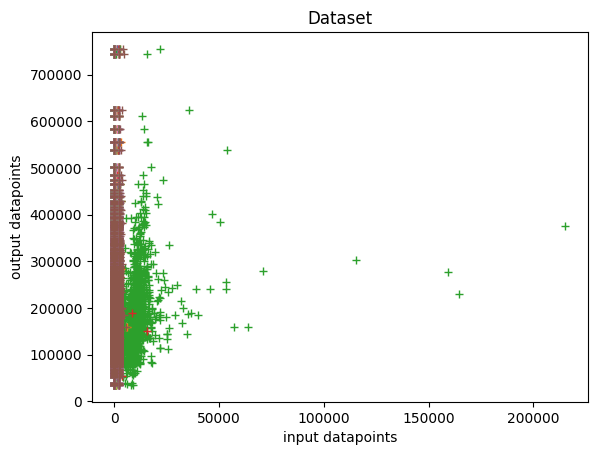

In [35]:
plt.plot(X,Y ,'+')
plt.xlabel("input datapoints")
plt.ylabel("output datapoints")
plt.title("Dataset")
plt.show()

# BUILD LR MODEL

#### Training phase

In [36]:
from sklearn.model_selection import train_test_split 
xtrain , xtest ,ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state = 42)
from sklearn.linear_model import LinearRegression

In [37]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)


(1168, 286) (292, 286) (1168,) (292,)


In [38]:
LR = LinearRegression()# takes only 2d data
LR.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
LR.intercept_

np.float64(-569709.5550664128)

In [40]:
LR.coef_

array([ 5.15136286e+01,  2.97680283e+01,  6.47774640e-01,  6.77895213e+03,
        5.73530037e+03,  3.49247819e+02,  1.29935137e+02,  2.13541149e+01,
        1.78581941e+01,  7.95317442e+00, -2.04071091e-01,  2.56071440e+01,
        1.02399382e+01,  3.05617480e+01, -1.08699217e+01,  2.99317740e+01,
        1.39810508e+03, -1.60086252e+03,  2.79354741e+03,  1.26462011e+03,
       -2.55847784e+03, -1.28323430e+04,  1.41771436e+03,  6.47164854e+03,
       -3.21299192e+01,  1.32412307e+03,  3.07685102e+01,  1.55264452e+01,
       -2.69921137e-01,  1.93966092e+00,  4.95236881e+01,  2.51012005e+01,
        7.87564459e+01, -2.45011730e-01, -4.12728248e+02, -2.47866635e+02,
       -1.84316791e+04,  1.16537862e+04,  5.78909336e+02,  2.55175933e+03,
        3.64722423e+03, -1.11211418e+04,  1.11211418e+04, -4.02308195e+03,
        2.62213615e+03,  3.87520186e+03, -2.47425606e+03, -2.28032502e+03,
        1.13956438e+04, -1.06589094e+04,  1.54359059e+03,  1.21936500e+04,
       -1.21936500e+04,  

#### testing phase

In [41]:
y_pred = LR.predict(xtest)

# VISUALISE ACTUAL VS PREDICTED DATA

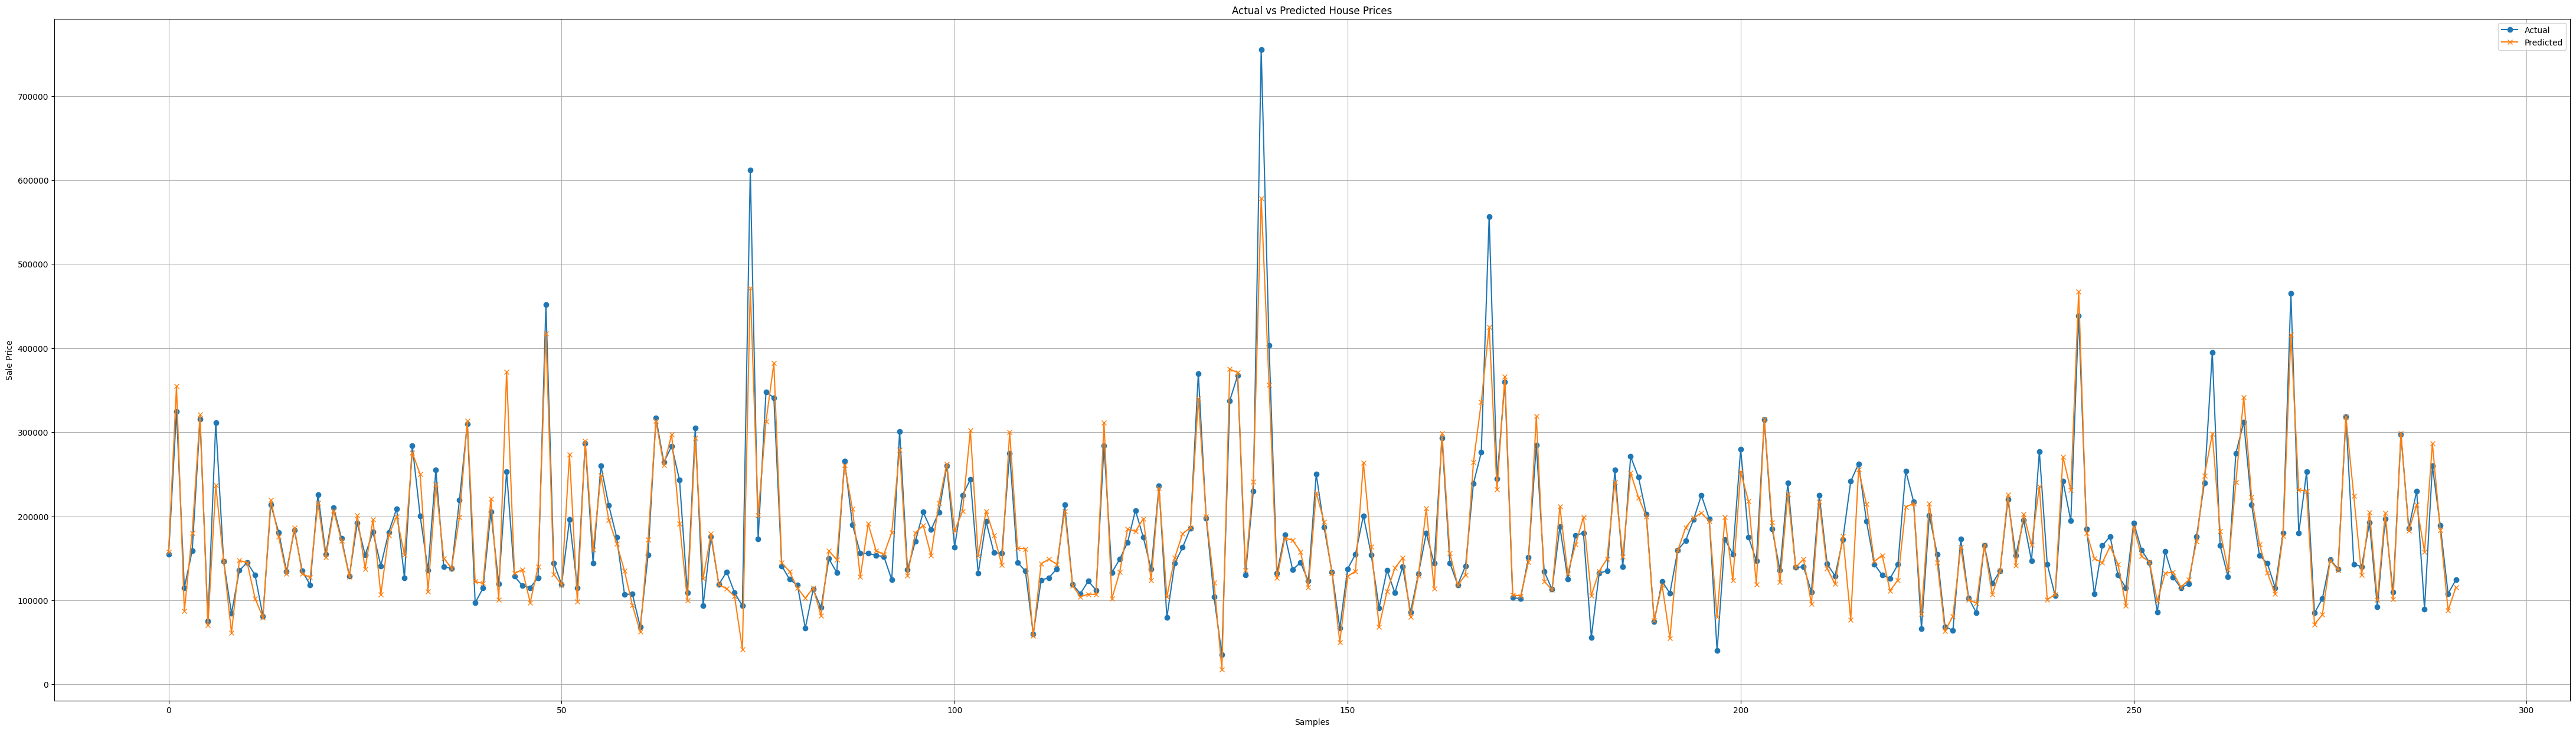

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(55,15))
plt.plot(ytest, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Samples')
plt.ylabel('Sale Price')
plt.legend()
plt.grid(True)
plt.savefig("Line_Plot.jpg",dpi=300)
plt.show()


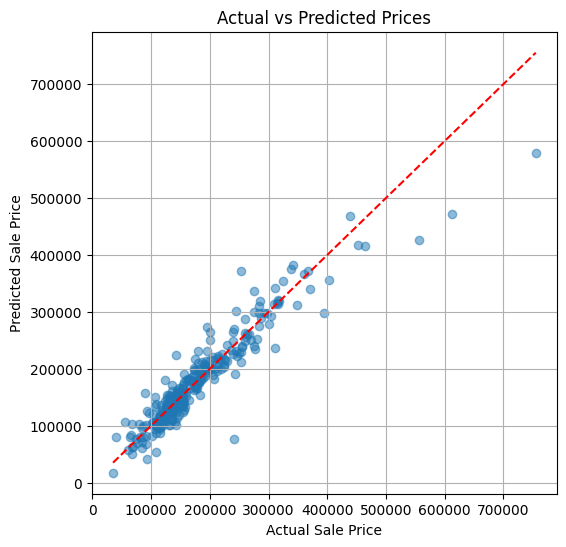

In [43]:
plt.figure(figsize=(6,6))
plt.scatter(ytest, y_pred, alpha=0.5)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()],'r--')  # Diagonal reference line

# (1st arg)	These are X-values — the start and end points on the X-axis
# (2nd arg)	These are Y-values — the start and end points on the Y-axis

plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.savefig("Scatter_Plot.jpg",dpi=300)
plt.show()


In [44]:
print(ytest.min(),ytest.max())

35311 755000


# MODEL EVALUATION

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [46]:
MSE = mean_squared_error(ytest,y_pred)
MAE = mean_absolute_error(ytest,y_pred)
r2= r2_score(ytest,y_pred)

In [47]:
print("MSE: {}".format(MSE))
print("MAE:{}".format(MAE))
print("R2 Score:{}".format(r2))

MSE: 876060475.1274503
MAE:18601.6696175247
R2 Score:0.8857857604143904


# save the trained model 

In [48]:
import joblib
joblib.dump(LR,"LR_HPP.pkl") 

['LR_HPP.pkl']

# other details

In [49]:
train_df_d.loc[:,'SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [50]:
train_df_d.loc[:,'SaleType'].unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [63]:
train_df_d.loc[:,'OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [65]:
train_df_d.loc[:,'GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'None', 'Basment',
       '2Types'], dtype=object)